<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Oriba_ABCXYZ_ARIMA_produto_medio_v20220916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# ARIMA Forecast
---

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 29.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Aquisição e Transformações dos Dados



In [ ]:
df = pd.read_excel('https://github.com/Rogerio-mack/ABCXYZ/raw/main/Base_Prof_15set22.xlsx')
df.head()

,Produtos,Foi vendido em 2021?,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Azul Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,26
1,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,30
2,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,19
3,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Cargo Algodão Orgânico Light Verde Oliva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,35
4,Bermuda Chambray Azul,Bermuda Chambray Azul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
df.columns

Index(['Produtos', 'Foi vendido em 2021?', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12'],
      dtype='object')

In [ ]:
# df = df.drop(columns=[ 'Classificação', 'R2', 'CV'])
df = df.drop(columns='Foi vendido em 2021?')
df.head()

,Produtos,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,Bermuda Cargo Algodão Orgânico Light Azul Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,26
1,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,30
2,Bermuda Cargo Algodão Orgânico Light Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,19
3,Bermuda Cargo Algodão Orgânico Light Verde Oliva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,35
4,Bermuda Chambray Azul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
np.matrix(df.drop(columns='Produtos'))

matrix([[nan, nan, nan, ..., nan,  8., 26.],
        [nan, nan, nan, ..., nan, 12., 30.],
        [nan, nan, nan, ..., nan,  9., 19.],
        ...,
        [nan, nan, nan, ...,  3.,  2.,  2.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]])

In [ ]:
np.matrix(df.drop(columns='Produtos')).T

matrix([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  3.,  0.,  0.],
        [ 8., 12.,  9., ...,  2.,  0.,  0.],
        [26., 30., 19., ...,  2.,  0.,  0.]])

In [ ]:
df_new = pd.DataFrame(np.matrix(df.drop(columns='Produtos')).T)
df_new.columns = df.Produtos.values

df_new.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df_new

In [ ]:
start='1/1/2018'
end='1/1/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
index_dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
df.index = index_dates
df.rename(columns={'Produtos':''})

df.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Bermuda Cargo Algodão Orgânico Light Azul Marinho    46
Bermuda Cargo Algodão Orgânico Light Cinza Chumbo    46
Bermuda Cargo Algodão Orgânico Light Preto           46
Bermuda Cargo Algodão Orgânico Light Verde Oliva     46
Bermuda Chambray Azul                                26
                                                     ..
Track Pants OldSchool ORIBA+PACE Azul Marinho        45
Track Pants OldSchool ORIBA+PACE Preto               44
Tricot Crewneck Patch ORIBA+PACE Preto               44
Tricot Listrado Navy/Off White                       17
Tricot Listrado Off White/Navy                       17
Length: 505, dtype: int64

In [ ]:
# do not ommit NA's

# print( df.shape )
# df = df.dropna(axis=1)
# print( df.shape )

(24, 505)
(24, 20)


In [ ]:
df.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizando as demandas

In [ ]:
df['produto_medio'] = df.mean(axis=1)

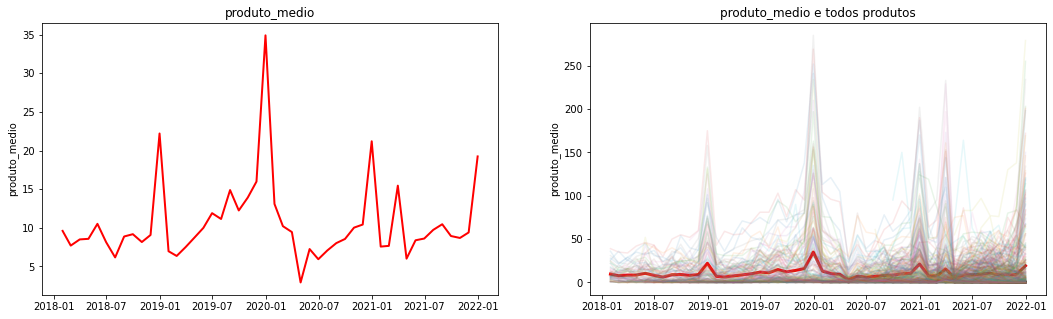

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,5))


sns.lineplot( x=df.index, y=df[ 'produto_medio' ],lw=2,ax=ax[0],c='r' )
ax[0].set_title( 'produto_medio' )

sns.lineplot( x=df.index, y=df[ 'produto_medio' ],lw=3,ax=ax[1],c='r' )
for produto in df:
  sns.lineplot( x=df.index, y=df[produto],ax=ax[1],alpha=0.1 )

ax[1].set_title( 'produto_medio e todos produtos' )

plt.show()

# Modelo ARIMA

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
produto = 'produto_medio'

model = pm.auto_arima(df[produto].dropna(), seasonal=True, m=12)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -92.126
Date:                              Fri, 16 Sep 2022   AIC                            190.251
Time:                                      14:49:21   BIC                            195.002
Sample:                                  01-31-2018   HQIC                           191.909
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6762      0.145      4.665      0.000       0.392       0.960
ma.S.L12      -0.5469      0.263     -2.080      0.038      -1.062      -0.032
sigma2         8.5667      2.049      4.181      0.000       4.551      12.582
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.81   Prob(JB):                         0.52
Heteroskedasticity (H):               1.18   Skew:                             0.17
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.aic()

190.25110466225533

# Predict

In [ ]:
fc, conf_int = model.predict(n_periods=24, return_conf_int=True)
print(fc, conf_int)

2022-01-31     4.926107
2022-02-28     5.266908
2022-03-31     9.879614
2022-04-30     4.619720
2022-05-31     7.705023
2022-06-30     7.780644
2022-07-31     8.444865
2022-08-31    10.074598
2022-09-30     9.218302
2022-10-31     9.700811
2022-11-30    10.621976
2022-12-31    22.578605
2023-01-31     7.185402
2023-02-28     6.794728
2023-03-31    10.912782
2023-04-30     5.318387
2023-05-31     8.177487
2023-06-30     8.100142
2023-07-31     8.660922
2023-08-31    10.220704
2023-09-30     9.317104
2023-10-31     9.767625
2023-11-30    10.667158
2023-12-31    22.609159
Freq: M, dtype: float64 [[-8.44151264e-01  1.06963643e+01]
 [-1.68424554e+00  1.22180612e+01]
 [ 2.45073048e+00  1.73084965e+01]
 [-3.01767106e+00  1.22571101e+01]
 [-2.58313395e-02  1.54358766e+01]
 [ 7.45143235e-03  1.55538357e+01]
 [ 6.52449269e-01  1.62372808e+01]
 [ 2.27354036e+00  1.78756563e+01]
 [ 1.41358523e+00  1.70230180e+01]
 [ 1.89505740e+00  1.75065648e+01]
 [ 2.81713734e+00  1.84268156e+01]
 [ 1.47772228e+

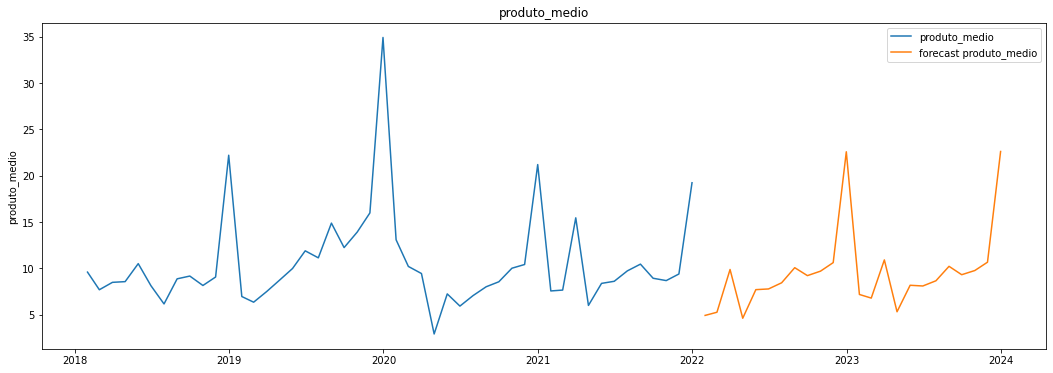

In [ ]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[produto], label=produto )
sns.lineplot( x=fc.index, y=fc.values, label='forecast ' + produto)
plt.title( produto )
plt.legend()

plt.show()